In [1]:
import os
os.environ["WANDB_DISABLED"] = "true"

import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

In [18]:
import analyze_utils

checkpoint_folder = "/home/jxm3/research/retrieval/inversion/saves/98b1418d38c3f9333b17ab20bff06ff9/"
trainer = analyze_utils.load_trainer(checkpoint_folder)

Loading trainer for analysis – setting --do_eval=1
loading alias dpr_nq__msl32_beta from /home/jxm3/research/retrieval/inversion/saves/db66b9c01b644541fedbdcc59c53a285/ebb31d91810c4b62d2b55b5382e8c7ea...
Set train_args.dataloader_num_workers = 4


/home/jxm3/.conda/envs/torch/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


================ Begin trainer sanity check ================
	Input to encode -> Twas brillig, and the slithy toves, Did gyre and gimble in the wabe, All mimsy were the borogoves, And the mome raths outgrabe.
	Decoded output -> The mlbies wase wyst bograge; And the sliths and toms wre
================ End trainer sanity check ================


[nltk_data] Downloading package wordnet to /home/jxm3/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jxm3/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jxm3/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## hparam tuning

In [31]:
data = []
for beta in [1.0, 0.5, 0.1]:
    for gamma in [.01, .1, 1.0,]:
        print(gamma)
        trainer.inversion_trainer.gen_kwargs = {
            "early_stopping": False,
            "num_beams": 1,
            "do_sample": False,
            "no_repeat_ngram_size": 0,
        }
        trainer.inversion_trainer.args.per_device_eval_batch_size = 64
        trainer.inversion_trainer.generation_strategy = "contrastive"
        trainer.inversion_trainer.contrastive_generation_alpha = 0.0
        trainer.inversion_trainer.contrastive_generation_beta = beta
        trainer.inversion_trainer.contrastive_generation_gamma = gamma
        trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 2
        trainer.inversion_trainer.contrastive_generation_num_rounds = 1
        metrics = trainer.inversion_trainer.evaluate(
            eval_dataset=trainer.eval_dataset["nq"]
        )
        metrics['beta'] = beta
        metrics['gamma'] = gamma
        data.append(metrics)

0.01


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
0.1


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the skulls of
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% agreed that they should be protected from discrimination. Among the 35%, 15% disagreed with HR
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
1.0


extensitive depasiradically depasi broadlyjudeţul broadly expansion closest together specificallyvocation tocativa strengths whichconnectlatigateemis integral portions alongARE integralDimensiuniencompassingDimensiuniaturaatura
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



emoți conservator incercat sticla gradini parinti orizont parinti gradini sticla sticla sticla sticla incercat (...) To win consumulaparatulbirth within consciousness sticla taiatantesvâr sticla sticla sticla taiat leader
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



organismului suprafaţ galben (+politacît328unicipiuluijudeţul Popescu 8. organismului Stra Orthodrupolis gasest (+6.6 PopescuPopсиkraticunicipiului Popescuunicipiului gasest Popescuunicipiului
the same rights as straight people, while 15% disagreed. Additionally, 69% ag

to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
0.1


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the skulls of
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
1.0


to the character of the skull, which are relatively smooth and untural unlike the sutures of the portions of the infant sutures. For instance,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual swimmer from Australia to win a Winter Olympic medal, and to win the short-season relay gold medal, and was also part of the Warm-
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same percentage as straight people, while 15.33% disagreed and indicated that they should be protected from discrimination or harassment. Eighth percent aligne
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
0.01


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win the Winter Olympic relay gold medal, and was also part of the Australian Short Track team, which won gold
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
0.1


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the sutures,
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as men, and 75% agreed that they should be protected from discrimination. Among the other 15%, gay workers are no longer exp
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H
1.0


to the character of the skull, which are relatively smooth and untutuous in the case of infant sutures. Unlike the skulls of
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win the Winter Olympic relay, and was part of the Southern Hemisphere team, which won the short
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as straight people, and 7% agreed that they should be protected from discrimination. Among the 35%, 15% disagreed with HR
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


In [37]:
j = 0
for beta in [1.0, 0.5, 0.1]:
    for gamma in [.01, .1, 1.0,]:
        data[j]['beta'] = beta
        data[j]['gamma'] = gamma
        j += 1

In [38]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,eval_loss,eval_accuracy,eval_bleu_score,eval_meteor_score,eval_rouge_score,eval_bert_score,eval_emb_cos_sim,eval_perplexity,eval_runtime,eval_samples_per_second,eval_steps_per_second,beta,gamma
0,1.051722,0.738002,31.873040,0.582110,0.645350,0.917574,0.906060,2.862577,29.1788,17.136,0.274,1.0,0.01
1,1.051722,0.738002,33.001125,0.598502,0.656074,0.920051,0.909388,2.862577,28.8711,17.318,0.277,1.0,0.10
2,1.051722,0.738002,0.063540,0.024825,0.034587,0.739477,0.194440,2.862577,32.0273,15.612,0.250,1.0,1.00
3,1.051722,0.738002,31.804502,0.579873,0.644134,0.917504,0.905665,2.862577,29.1862,17.131,0.274,0.5,0.01
4,1.051722,0.738002,31.887780,0.586260,0.647375,0.918036,0.907824,2.862577,29.4973,16.951,0.271,0.5,0.10


In [ ]:
df.sort_values(by='eval_bleu_score', ascending=False)[['gamma', 'beta', 'eval_bleu_score']]

<Axes: xlabel='beta', ylabel='gamma'>

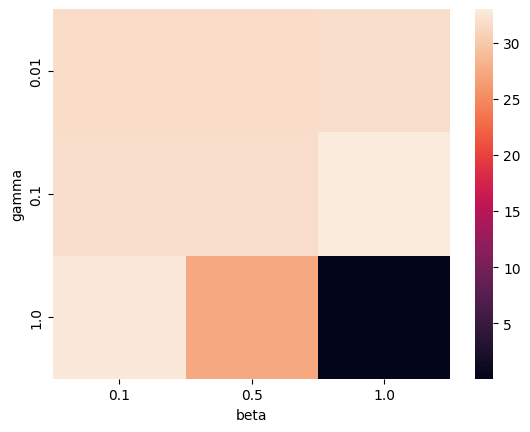

In [39]:
import seaborn as sns

sns.heatmap(df.pivot(index='gamma', columns='beta', values='eval_bleu_score'))

## testing multi-round decoding

In [24]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 4,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.args.per_device_eval_batch_size = 64
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 1
trainer.inversion_trainer.contrastive_generation_num_rounds = 1
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual hemisphere athlete from Australia to win a Winter Olympic medal, and was part of the Southern Hemisphere relay team, which won
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination and harassment. A third percent disagreed, with 15%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0517222881317139,
 'eval_accuracy': 0.7380022321428571,
 'eval_bleu_score': 35.519346586060166,
 'eval_meteor_score': 0.6205339937767889,
 'eval_rouge_score': 0.6791500046812591,
 'eval_bert_score': 0.9250462216192058,
 'eval_emb_cos_sim': 0.9194977283477783,
 'eval_perplexity': 2.862577057394165,
 'eval_runtime': 42.3922,
 'eval_samples_per_second': 11.795,
 'eval_steps_per_second': 0.189}

In [25]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 4,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.args.per_device_eval_batch_size = 64
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 1
trainer.inversion_trainer.contrastive_generation_num_rounds = 2
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win a Winter Olympic gold medal, and was part of the Australian relay team, which won the short track
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination and harassment. A third percent disagreed, with 15%
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0517222881317139,
 'eval_accuracy': 0.7380022321428571,
 'eval_bleu_score': 35.50778495813029,
 'eval_meteor_score': 0.6201892577206026,
 'eval_rouge_score': 0.6806935869112787,
 'eval_bert_score': 0.9246933997741767,
 'eval_emb_cos_sim': 0.9174511432647705,
 'eval_perplexity': 2.862577057394165,
 'eval_runtime': 103.3993,
 'eval_samples_per_second': 4.836,
 'eval_steps_per_second': 0.077}

In [26]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 4,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.args.per_device_eval_batch_size = 64
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 1
trainer.inversion_trainer.contrastive_generation_num_rounds = 4
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

to that of the skulls of infant sutures, which are relatively smooth and untidy, despite the character of the skull. Thus
to the character of the sutures of the skull which, like those of the infant skull, are relatively smooth and untortuous. In fact



individual from the Southern Hemisphere to win a Winter Olympic medal, and was part of the Australian relay team that won the short track gold medal
individual from the Southern Hemisphere, to win a Winter Olympic gold medal and was also part of the short track relay team that won Australia'



the same rights as heterosexuals, and 75% agreed that they should be protected from discrimination. A third, 15%, disagreed with workplace O
the same rights as straight people, while 15% disagreed. Additionally, 69% agreed that they should be protected from workplace discrimination. 13% of H


{'eval_loss': 1.0517222881317139,
 'eval_accuracy': 0.7380022321428571,
 'eval_bleu_score': 35.55991535646119,
 'eval_meteor_score': 0.6214096962480463,
 'eval_rouge_score': 0.6818722219445803,
 'eval_bert_score': 0.9253840747156313,
 'eval_emb_cos_sim': 0.9218592643737793,
 'eval_perplexity': 2.862577057394165,
 'eval_runtime': 300.6379,
 'eval_samples_per_second': 1.663,
 'eval_steps_per_second': 0.027}

In [27]:
trainer.inversion_trainer.gen_kwargs = {
    "early_stopping": False,
    "num_beams": 4,
    "do_sample": False,
    "no_repeat_ngram_size": 0,
}
trainer.inversion_trainer.args.per_device_eval_batch_size = 64
trainer.inversion_trainer.generation_strategy = "contrastive"
trainer.inversion_trainer.contrastive_generation_alpha = 0.0
trainer.inversion_trainer.contrastive_generation_gamma = 0.1
trainer.inversion_trainer.contrastive_generation_hypothesis_num_samples = 1
trainer.inversion_trainer.contrastive_generation_num_rounds = 8
trainer.inversion_trainer.evaluate(
    eval_dataset=trainer.eval_dataset["nq"]
)

KeyboardInterrupt: 